In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("preetviradiya/brian-tumor-dataset")

print("Path to dataset files:", path)

100%|██████████| 107M/107M [00:01<00:00, 110MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/preetviradiya/brian-tumor-dataset/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/preetviradiya/brian-tumor-dataset/versions/1'

In [ ]:
path = "/content/kaggle (1).json"

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: suyognagbhide
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset


100%|██████████| 107M/107M [00:06<00:00, 17.5MB/s]


In [ ]:
import keras
import tensorflow as tf

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
img_dir = '/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set'

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150, 150, 1)

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        color_mode = "grayscale",
                                         shuffle=True,
                                         class_mode='binary',
                                        subset='training')

Found 3681 images belonging to 2 classes.


In [ ]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        color_mode = "grayscale",
                                         shuffle=True,
                                         class_mode='binary',
                                        subset='validation')

Found 919 images belonging to 2 classes.


In [ ]:
labels = (train_gen.class_indices)
print(labels)

{'Brain Tumor': 0, 'Healthy': 1}


making model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
#model.add(keras.layers.InputLayer(input_shape=(150,150,1)))
model.add(Conv2D(16,(3,3), activation="relu", input_shape=(150,150,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,743,121 (18.09 MB)

 Trainable params: 4,743,121 (18.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_gen, verbose=1, epochs=10, validation_data=val_gen, steps_per_epoch=3681//64, validation_steps=919//64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.6595 - loss: 0.6074 - val_accuracy: 0.8136 - val_loss: 0.4039
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.4684 - val_accuracy: 0.8696 - val_loss: 0.3407
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.8542 - loss: 0.3552 - val_accuracy: 0.8025 - val_loss: 0.4182
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8906 - loss: 0.2710 - val_accuracy: 0.7391 - val_loss: 0.4625
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9132 - loss: 0.2238 - val_accuracy: 0.9408 - val_loss: 0.1728
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9531 - loss: 0.1383 - val_accuracy: 0.9130 - val_loss: 0.2272
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9498 - loss: 0.1361 - val_accuracy: 0.9375 - val_loss: 0.1552
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.9688 - loss: 0.0975 - val_accuracy: 0.9565 - val_loss: 0.1631
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.9766 - val_loss: 0.0730
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9844 - loss: 0.0740 - val_accuracy: 1.0000 - 

In [ ]:
test_loss, test_acc = model.evaluate(val_gen, verbose=2)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


15/15 - 1s - 98ms/step - accuracy: 0.9782 - loss: 0.0708


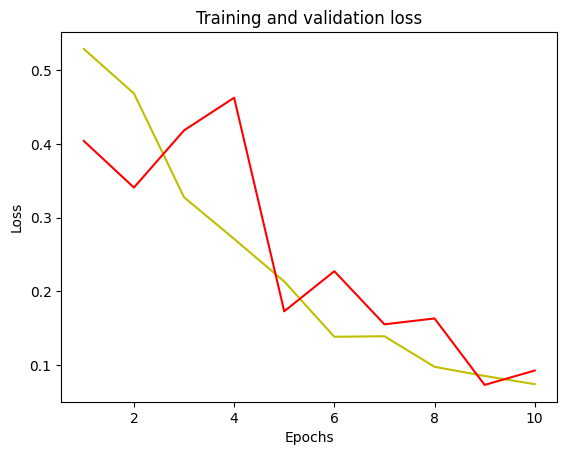

Text(0, 0.5, 'Accuracy')

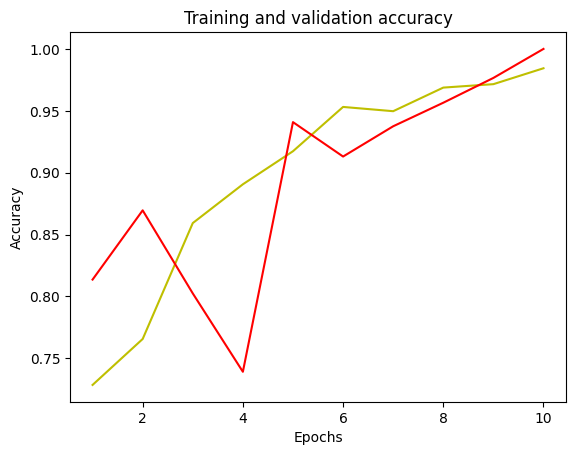

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
model.save("model.h5")

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

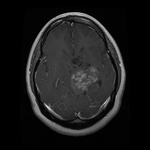

In [ ]:
data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)
image = Image.open(f"/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg")
size = (150,150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.asarray(image)
display(image)
data = image_array.reshape(1,150,150,1)

In [ ]:
prediction = model.predict(data)
print(prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0.0


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
